# PPCA work in 2021 

## learn TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### 数据集

我们采用了fashion Mnist

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

要对数据进行一定的处理，将图片数据归一化

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### 视觉工具

In [ ]:
def visualize(histories):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
  
    for history in histories:
        accuracy.append(history.history['accuracy'])
        val_accuracy.append(history.history['val_accuracy'])
        loss.append(history.history['loss'])
        val_loss.append(history.history['val_loss'])
  
    accuracy = np.mean(accuracy, axis=0)
    val_accuracy = np.mean(val_accuracy, axis=0)
    loss = np.mean(loss, axis=0)
    val_loss = np.mean(val_loss, axis=0)
    epochs = range(1, len(loss) + 1)
  
    # 暂时没有找到对 k-fold 的 Early stopping 的方法，只好手动了。
    # 如果在一轮后的10轮内，val_loss不再下降，给出 Overfitting warning
    x = []
    y = []
    patience = 10
    i = 0
    for i in range(len(val_loss) - patience):
        flag = True
        for j in range(1, patience + 1):
            if val_loss[i] * 0.98 > val_loss[i + j]: # 在之后的10轮中，下降不超过2%，视为过拟合
                flag = False
                break 
        if flag ==True:
            x.append(i + 1)
            y.append(val_loss[i])
            print('Overfitting warning at epoch %d, val_loss: %.3f, val_accuracy: %.3f' % (i+1, val_loss[i], val_accuracy[i]))  
            break

    plt.figure(figsize=(12, 4))

    plt.subplot(1,2,1)
    plt.plot(epochs, loss, 'o', label = 'loss')
    plt.plot(epochs,val_loss, label = 'val_loss')
    plt.scatter(x,y,c='r')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, 'o', label = 'accuracy')
    plt.plot(epochs,val_accuracy, label = 'val_accuracy')
    plt.scatter(x, [val_accuracy[x[0]-1]], c='r')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.show()

### 训练模型

为了解决这个图像分类问题，我们采用了三种模型，分别是感知器、DNN、CNN

#### 线性分类器

这里采用了单层神经网络，即感知器，是一种线性分类器



##### 构建模型
总共有两层，一层负责将图像转换成向量，一层是softmax的输出层

In [ ]:
def build_model_Perceptron():
    
    # 设置层
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),# 将图片处理成为向量
        keras.layers.Dense(10)# 输出结果层，使用softmax
    ])
    
    # 编译模型
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

##### 馈送数据  && 评估

In [ ]:
def fit_data_Perceptron(model):
    history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), verbose=1)
    return history

##### 评估模型

In [ ]:
def value_model_Perceptron(model):
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    print('\nTest accuracy:', test_acc)

##### 运行模型，查看结果

In [ ]:
with tf.device("/cpu:0"):
    model_per = build_model_Perceptron()
    fit_data_Perceptron(model_per)
    value_model_Perceptron(model_per)

Epoch 1/10
1875/1875 [==============================] - 1s 526us/step - loss: 0.7805 - accuracy: 0.7347 - val_loss: 0.5160 - val_accuracy: 0.8182
Epoch 2/10
1875/1875 [==============================] - 1s 474us/step - loss: 0.4695 - accuracy: 0.8402 - val_loss: 0.4863 - val_accuracy: 0.8355
Epoch 3/10
1875/1875 [==============================] - 1s 481us/step - loss: 0.4388 - accuracy: 0.8485 - val_loss: 0.4570 - val_accuracy: 0.8414
Epoch 4/10
1875/1875 [==============================] - 1s 475us/step - loss: 0.4228 - accuracy: 0.8549 - val_loss: 0.4586 - val_accuracy: 0.8421
Epoch 5/10
1875/1875 [==============================] - 1s 478us/step - loss: 0.4124 - accuracy: 0.8571 - val_loss: 0.4555 - val_accuracy: 0.8413
Epoch 6/10
1875/1875 [==============================] - 1s 479us/step - loss: 0.4094 - accuracy: 0.8583 - val_loss: 0.4506 - val_accuracy: 0.8426
Epoch 7/10
1875/1875 [==============================] - 1s 474us/step - loss: 0.4016 - accuracy: 0.8615 - val_loss: 0.4555 -

### DNN 

最高精确度有限

##### 构建模型
总共有三层，一层负责将图像转换成向量，中间有一个隐藏层，一层是softmax的输出层

In [ ]:
def build_model_DNN():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    
    # 编译模型
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

##### 馈送数据

In [ ]:
def fit_data_DNN(model):
    history = model.fit(train_images, train_labels, epochs=40, batch_size=128, 
                    validation_data=(test_images, test_labels), verbose=1)
    return history

##### 评估模型

In [ ]:
def value_model_DNN(model):
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print('\nTest accuracy:', test_acc)

##### 运行模型，查看结果

In [ ]:
with tf.device("/cpu:0"):
    model_dnn = build_model_DNN()
    fit_data_DNN(model_dnn)
    value_model_DNN(model_dnn)

Epoch 1/40
469/469 [==============================] - 1s 2ms/step - loss: 0.7747 - accuracy: 0.7278 - val_loss: 0.4424 - val_accuracy: 0.8422
Epoch 2/40
469/469 [==============================] - 1s 1ms/step - loss: 0.4346 - accuracy: 0.8449 - val_loss: 0.4038 - val_accuracy: 0.8541
Epoch 3/40
469/469 [==============================] - 1s 1ms/step - loss: 0.3869 - accuracy: 0.8613 - val_loss: 0.3787 - val_accuracy: 0.8635
Epoch 4/40
469/469 [==============================] - 1s 1ms/step - loss: 0.3711 - accuracy: 0.8663 - val_loss: 0.3633 - val_accuracy: 0.8721
Epoch 5/40
469/469 [==============================] - ETA: 0s - loss: 0.3454 - accuracy: 0.87 - 1s 1ms/step - loss: 0.3456 - accuracy: 0.8721 - val_loss: 0.3612 - val_accuracy: 0.8692
Epoch 6/40
469/469 [==============================] - 1s 1ms/step - loss: 0.3341 - accuracy: 0.8771 - val_loss: 0.3520 - val_accuracy: 0.8718
Epoch 7/40
469/469 [==============================] - 1s 1ms/step - loss: 0.3294 - accuracy: 0.8776 - val_

### CNN

对于cv学习，采用CNN预期可以获得更好的准确率

#### 扩展数据

2D卷积层 Conv2D 的输入是一个四维张量：(batch, rows, cols, channels)，所以需要将图像数据拓展一个维度。

In [ ]:
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

##### 构建模型

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

def build_model_CNN():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.summary()
    model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

##### 馈送数据 && 评估

In [ ]:
def fit_data_CNN(model):
    history = model.fit(train_images, train_labels, epochs=30, batch_size=128, 
                    validation_data=(test_images, test_labels), verbose=0)
    return history

##### 运行模型

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 576)              

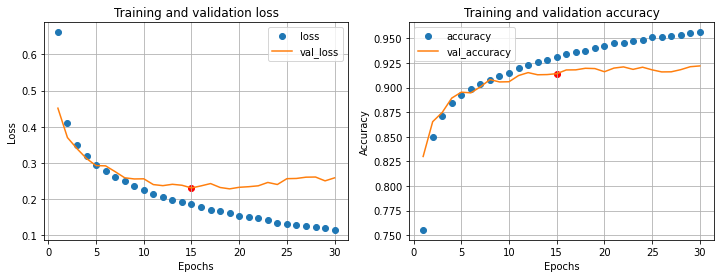

In [ ]:
with tf.device("/gpu:0"):
    model_cnn = build_model_CNN()
    res = fit_data_CNN(model_cnn)
    visualize([res])